# STEPS

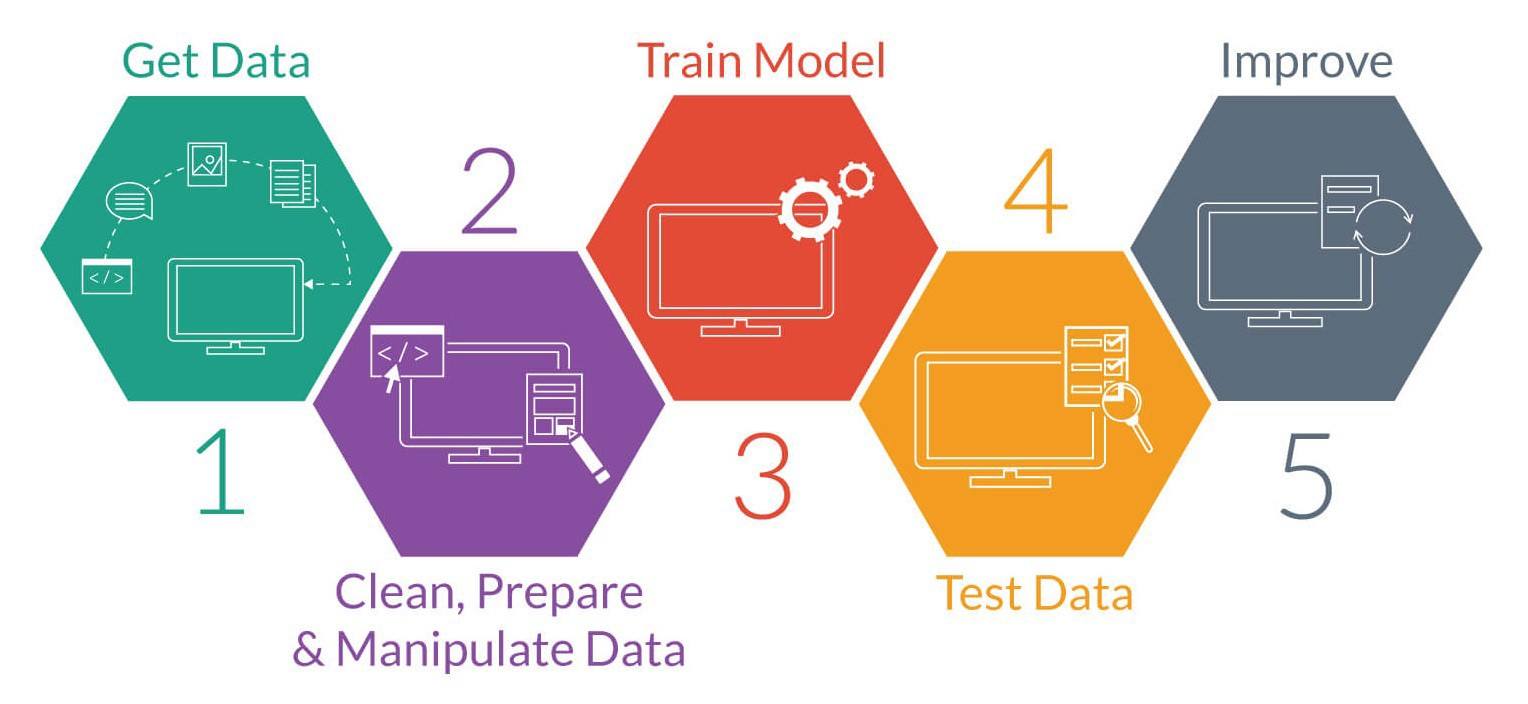

In [1]:
from IPython.display import Image
Image(filename='mlsteps.png')

In [1]:
import pandas as pd
import csv
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from numpy import random, where
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np

# 1. Getting Data

In [2]:
df= pd.read_csv('we1775srv$ (2).csv',low_memory=False)
#print(df['TaskCategory'].unique())

data = list(df['message'])
print(data)

['08/28/2016 23:59:00 PM\nLogName=Security\nSourceName=Microsoft Windows security auditing.\nEventCode=4703\nEventType=0\nType=Information\nComputerName=we1775srv.waynecorpinc.local\nTaskCategory=Authorization Policy Change\nOpCode=Info\nRecordNumber=516329\nKeywords=Audit Success\nMessage=A user right was adjusted.\n\nSubject:\n\tSecurity ID:\t\tNT AUTHORITY\\SYSTEM\n\tAccount Name:\t\twe1775srv$\n\tAccount Domain:\t\tWAYNECORPINC\n\tLogon ID:\t\t0x3E7\n\nTarget Account:\n\tSecurity ID:\t\tNT AUTHORITY\\SYSTEM\n\tAccount Name:\t\twe1775srv$\n\tAccount Domain:\t\tWAYNECORPINC\n\tLogon ID:\t\t0x3E7\n\nProcess Information:\n\tProcess ID:\t\t0x3b8\n\tProcess Name:\t\tC:\\Windows\\System32\\svchost.exe\n\nEnabled Privileges:\n\t\t\tSeAssignPrimaryTokenPrivilege\n\t\t\tSeIncreaseQuotaPrivilege\n\t\t\tSeSecurityPrivilege\n\t\t\tSeTakeOwnershipPrivilege\n\t\t\tSeLoadDriverPrivilege\n\t\t\tSeSystemtimePrivilege\n\t\t\tSeBackupPrivilege\n\t\t\tSeRestorePrivilege\n\t\t\tSeShutdownPrivilege\n\t\t

# 2. Clean, Prepare, Manipulate Data (Preprocessing)

In [3]:

patt4 = []

account_name = 'Account Name'
things = ['EventCode', 'TaskCategory', 'Message', 'Impersonation Level', 'Token Elevation Type', 'Source Address', 'Source Port', 'Logon Type', 'OpCode', 'Type', 'Keywords', 'Subject ID', 'Object Type', 'Access Mask', 'Accesses', 'Share Name', 'Share Path', 'New Process Name', 'Process Name', 'Creator Process Name', 'Process Command Line', 'Object Server', 'Access Reasons', 'Privileges Used for Access Check', 'Resource Attributes', 'Enabled Privileges', 'Privileges', 'Relative Target Name', 'SYNCHRONIZE', 'ReadAttributes', 'Logon Process Name', 'Group Name', 'Group Domain', 'Name', 'Original Security Descriptor', 'New Security Descriptor']
diction = {'msg': ''}

for patt in data:

    patt2 = patt.replace('\n','|')
    patt2 = patt2.replace(':|\t','|')
    patt2 = patt2.replace(':\t','|')
    patt2 = patt2.replace('=','|')
    patt2 = patt2.replace('\t','')
    patt3 = patt2.split('|')
    print(patt3)
    #index_account = patt3.index(account_name) + 1
    #name = patt3[index_account]

    msg = ''

    for j in things:
        if j in patt3:
            index = patt3.index(j) + 1
            msg = msg + ' ' + patt3[index]

    patt4.append(msg)
    diction['msg'] = patt4

print(diction['msg'])

'''df2 = pd.DataFrame(diction)

df2.to_csv('./users_pattern/user1')

print(df2)'''


['08/28/2016 23:59:00 PM', 'LogName', 'Security', 'SourceName', 'Microsoft Windows security auditing.', 'EventCode', '4703', 'EventType', '0', 'Type', 'Information', 'ComputerName', 'we1775srv.waynecorpinc.local', 'TaskCategory', 'Authorization Policy Change', 'OpCode', 'Info', 'RecordNumber', '516329', 'Keywords', 'Audit Success', 'Message', 'A user right was adjusted.', '', 'Subject', 'Security ID', 'NT AUTHORITY\\SYSTEM', 'Account Name', 'we1775srv$', 'Account Domain', 'WAYNECORPINC', 'Logon ID', '0x3E7', '', 'Target Account', 'Security ID', 'NT AUTHORITY\\SYSTEM', 'Account Name', 'we1775srv$', 'Account Domain', 'WAYNECORPINC', 'Logon ID', '0x3E7', '', 'Process Information', 'Process ID', '0x3b8', 'Process Name', 'C:\\Windows\\System32\\svchost.exe', '', 'Enabled Privileges', 'SeAssignPrimaryTokenPrivilege', 'SeIncreaseQuotaPrivilege', 'SeSecurityPrivilege', 'SeTakeOwnershipPrivilege', 'SeLoadDriverPrivilege', 'SeSystemtimePrivilege', 'SeBackupPrivilege', 'SeRestorePrivilege', 'SeSh

"df2 = pd.DataFrame(diction)\n\ndf2.to_csv('./users_pattern/user1')\n\nprint(df2)"

In [12]:
df2 = pd.DataFrame(diction)

df2.to_csv('user1.csv')

print(df2)

                                                   msg
0     4703 Authorization Policy Change A user right...
1     4703 Authorization Policy Change A user right...
2     4703 Authorization Policy Change A user right...
3     4703 Authorization Policy Change A user right...
4     4688 Process Creation A new process has been ...
..                                                 ...
433   4689 Process Termination A process has exited...
434   4703 Authorization Policy Change A user right...
435   4624 Logon An account was successfully logged...
436   4689 Process Termination A process has exited...
437   4688 Process Creation A new process has been ...

[438 rows x 1 columns]


# Continuation of 2

In [13]:
from scipy import spatial
from sent2vec.vectorizer import Vectorizer
import gensim
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
import pandas as pd

data3 = pd.read_csv('user1.csv')

vectorizer = Vectorizer()
sentence = list(data3['msg'])

vectorizer.run(sentence)

v_bert = vectorizer.vectors
print(v_bert[0])

dist_1 = spatial.distance.cosine(v_bert[0], v_bert[1])
dist_2 = spatial.distance.cosine(v_bert[0], v_bert[4])
print('dist_1: {0}, dist_2: {1}'.format(dist_1, dist_2))


Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[-8.23084861e-02 -3.48878294e-01  2.60868311e-01 -4.69892919e-02
 -2.67018825e-01 -2.00229257e-01  1.27566427e-01 -3.22069302e-02
  9.94203240e-02 -4.30111475e-02 -1.02478951e-01  9.75063667e-02
  2.51617767e-02  3.22955884e-02 -8.51850510e-02  1.00091584e-01
  1.59491245e-02  1.72960907e-01 -9.19200927e-02 -1.33391887e-01
  1.31196111e-01  9.13138688e-02  3.31929684e-01 -7.01043308e-02
 -1.84103161e-01  4.72101979e-02 -1.61861312e-02  2.64090776e-01
  5.53190783e-02  1.29917428e-01  2.36919858e-02  8.53397101e-02
  6.14274889e-02 -6.12178519e-02  5.68787344e-02  1.17497429e-01
  2.87122995e-01 -3.55839729e-04  1.95799217e-01 -1.10639133e-01
 -1.93735078e-01 -1.05973661e-01  1.28926203e-01  1.38662849e-02
  1.02429211e-01 -1.85105026e-01 -2.81422853e+00  3.01920593e-01
 -3.20759386e-01 -2.59621173e-01  9.01574641e-02  1.50140360e-01
 -1.13268062e-01  4.18151170e-02  1.53193936e-01  2.86744177e-01
  2.66025160e-02  5.28143123e-02  1.58176079e-01  1.62735805e-01
  2.76688486e-01  4.66295

# 3. Model Training

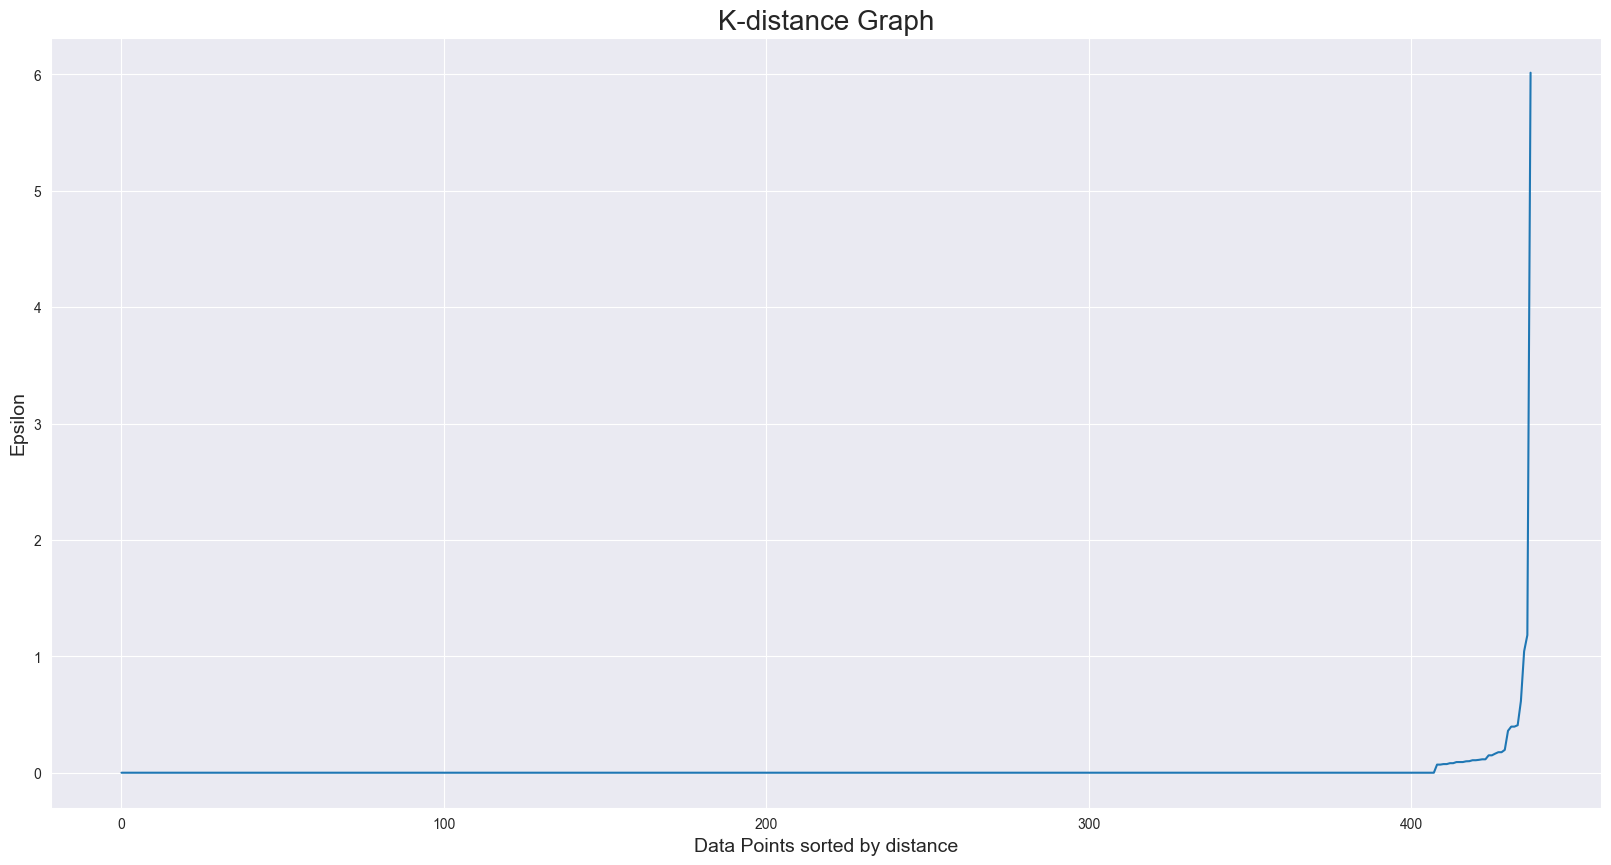

In [14]:
data3 = pd.read_csv('user1.csv')
arr = np.array(v_bert)
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(arr)
distances, indices = nbrs.kneighbors(arr)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

# Anomalies
# 42, 4670 Authorization Policy Change Permissions on an object were changed.
# 345, 5140 File Share A network share object was accessed.
# 578, 4985 File System The state of a transaction has changed.
# 601, 4670 Authorization Policy Change Permissions on an object were changed.
# 610, 4673 Sensitive Privilege Use A privileged service was called.

In [28]:
import numpy as np

model = DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
               metric_params=None, min_samples=2, n_jobs=None, p=None)

#We'll fit the model with x dataset and get the prediction data with the fit_predict() method.
#arr = np.array(display_arr)

pred = model.fit_predict(arr)

#Next, we'll extract the negative outputs as the outliers.

anom_index = where(pred == -1)
print(anom_index)

values = arr[anom_index]

(array([ 37, 170, 306, 314, 371], dtype=int64),)


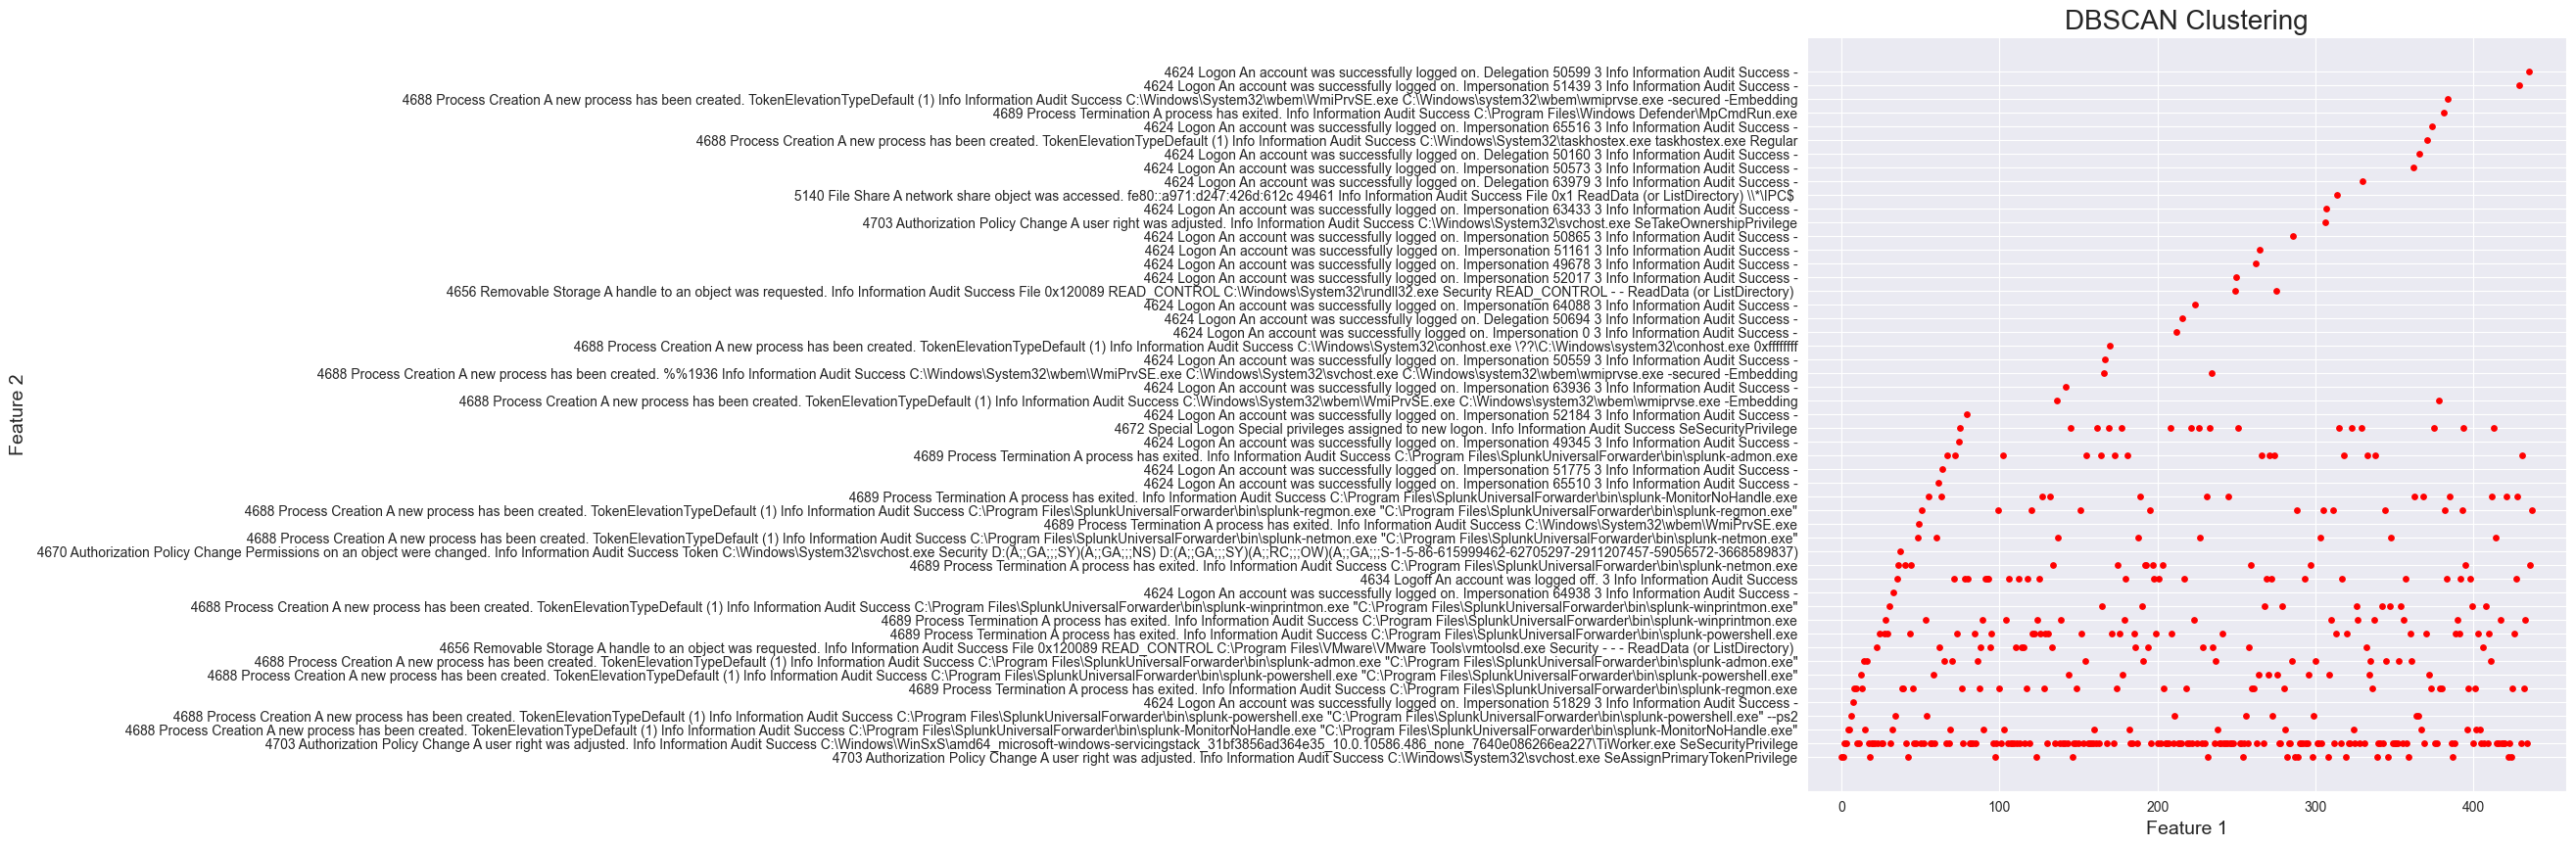

In [21]:
import matplotlib

plt.figure(figsize=(10,10))
plt.scatter(data3['Unnamed: 0'],data3['msg'],c='red',s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

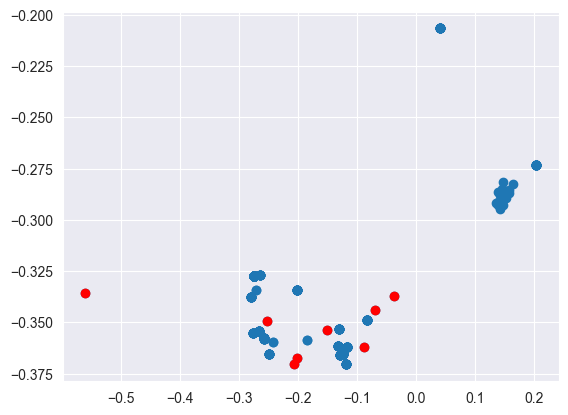

In [19]:
plt.scatter(arr[:,0], arr[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()
